# Basics of the study

This study is based on [this article](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/) from Jason Brownlee. The explanation is great and quite intuitive!

## Importing essential libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from sklearn.metrics import mean_squared_error, r2_score

## Importing series

### General IPCA  
General IPCA stands for general extended national consumer prices index.

In [27]:
ipca_general = pd.read_csv('IPCA-general.csv', sep=';', decimal=',')
ipca_general.columns = ['Date', 'Variation_Percentage', 'Dropme']
ipca_general = ipca_general.drop('Dropme', axis=1)
ipca_general.head()

,Date,Variation_Percentage
0,1980.01,6.615649
1,1980.02,4.616919
2,1980.03,6.038389
3,1980.04,5.286114
4,1980.05,5.702721


In [34]:
ipca_gen_series = np.array(ipca_general.Variation_Percentage)
ipca_gen_series = ipca_gen_series/100

# LSTM applications

## Standard LSTM

### Split method and model

In [38]:
# The series must first be prepared to fit the type of LSTM.
# This method can be used for both Standard and Stacked LSTMs.
def split_standard(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [35]:
# This model will use 12 timesteps, one for each month in a year, and a single feature.
n_steps_std = 12
n_features_std = 1

lstm_std = keras.models.Sequential()
lstm_std.add(keras.layers.LSTM(50, activation='relu', input_shape=(n_steps_std, n_features_std)))
lstm_std.add(keras.layers.Dense(1))
lstm_std.compile(optimizer='adam', loss='mse')

### General IPCA

In [39]:
X_IPCAgen_std, y_IPCAgen_std = split_standard(ipca_gen_series, n_steps_std)
# Reshape from [samples, timesteps] into [samples, timesteps, features]
X_IPCAgen_std = X_IPCAgen_std.reshape((X_IPCAgen_std.shape[0], X_IPCAgen_std.shape[1], n_features_std))

lstm_std.fit(X_IPCAgen_std, y_IPCAgen_std, epochs=200, verbose=0)

In [41]:
pred_IPCAgen_std = []
for index in range(len(X_IPCAgen_std)):
    input_aux = X_IPCAgen_std[index].reshape((1, n_steps_std, n_features_std))
    pred_IPCAgen_std.append(lstm_std.predict(input_aux))

1/1 [==============================] - 0s 68ms/step


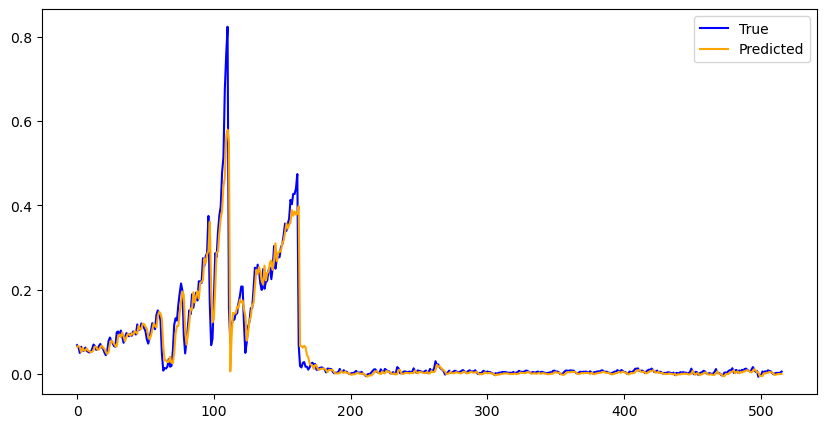

In [46]:
plt.figure(figsize=(10,5))
plt.plot(y_IPCAgen_std, color='blue', label='True')
plt.plot(np.array(pred_IPCAgen_std).flatten(), color='orange', label='Predicted')
plt.legend()

## Stacked LSTM

### General IPCA

## CNN LSTM

### General IPCA